In [52]:
#Load libraries
import csv
from textblob import TextBlob
import os
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
import string
import nltk 
#import textmining
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [53]:
os.chdir(r"C:\Users\RKrishna\OneDrive - National Instruments\Data\Project\covid-tweets")

In [54]:
#Load Text data
post = pd.read_csv("covid19_tweets.csv")
post

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0",NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74431,Laura Wolfrom,"Lexington, KY",The only things I collect are memories.,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mower with gas more often than I’ve filled up my car . #COVID19 #QuarantineLife,"['COVID19', 'QuarantineLife']",Twitter for iPhone,False
74432,Professor Tonya M. Evans,😷 #stayathome,"Law Prof @DickinsonLaw & Entrepreneur | Crypto, blockchain, info privacy, IP | @AdvantageEvans #FromCashtoCrypto | Host @AtTechIntersect | NU, Howard Law, AKA🌈",2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@BitcoinZay"" Jackson-#Bitcoin and Black America in the Age of #COVID19… https://t.co/VJK2XrID58","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App,False
74433,People's Daily app,"北京, 中华人民共和国",Our mission is to provide news and perspectives on China to a global audience. Download the app for news on China.,2018-02-04 12:36:42,1413,102,16,False,2020-08-04 03:13:22,"Community workers in Tianshan District of Urumqi, northwest #China's #Xinjiang Uygur Autonomous Region, have set up… https://t.co/AqYQHR8oRT","['China', 'Xinjiang']",Twitter Web App,False
74434,M0ser,NaN,Reagan conservative and attorney raised in the 700 level of the Vet. Diehard fan of the 2018 Super Bowl champs. #PrinciplesFirst,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us about the deadly unintended consequences of #COVID19 lockdowns months… https://t.co/iSlrx7A16M,['COVID19'],Twitter for iPhone,False


In [55]:
stops = stopwords.words("english")
punctuations = string.punctuation
post["sentiment"] = " "
for j in range(0, post.shape[0]):
    #print(i)
    words = post.iloc[j,9]
    words = words.split()
    words = " ".join(i for i in words if i.lower() not in stops)
    words = "".join(i for i in words if i.lower() not in punctuations)
    words = "".join(i for i in words if not i.isdigit())
    words = re.sub(r'^https?:\/\/.*[\r\n]*', '', words, flags=re.MULTILINE)
    post.iloc[j,9] = words
    blob = TextBlob(words)
    temp = pd.DataFrame({'Comments': words, 'Polarity': blob.sentiment.polarity}, index = [0])
    #post[j, 10] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        post.iloc[j,13] = "Happy"
    elif blob.sentiment.polarity < 0 :
        post.iloc[j,13] = "Sad"
    else:
        post.iloc[j,13] = "Neutral"

In [56]:
post['sentiment'].value_counts()

Neutral    33199
Happy      29061
Sad        12176
Name: sentiment, dtype: int64

In [57]:
df = pd.DataFrame()
df["Text"] = post["text"]
df["sentiment"] = post["hashtags"]
pd.set_option('display.max_colwidth', -1)
df['Text']

C:\Users\RKrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


0        smelled scent hand sanitizers today someone past would think intoxicated that… httpstcoQZvYbrOgb                      
1        Hey Yankees YankeesPR MLB  made sense players pay respects A… httpstcoQvWzgyPu                                        
2        diane wdunlap realDonaldTrump Trump never claimed COVID hoax claim effort to… httpstcoJkkvHWHb                        
3        brookbanktv one gift COVID give appreciation simple things always around me… httpstcoZpOAlFXcW                        
4         July  Media Bulletin Novel CoronaVirusUpdates COVID kansalrohit DrSyedSehrish airnewsalerts ANI… httpstcoMNEEcsJHh   
                                                                ...                                                            
74431    far summer filled lawn mower gas often I’ve filled car  COVID QuarantineLife                                          
74432    ICYMI REPLAY TechIntersect🧩  Isaiah BitcoinZay JacksonBitcoin Black America Age COVID… httpstco

In [58]:
words_corpus = ' '.join(df['Text'])

(-0.5, 399.5, 199.5, -0.5)

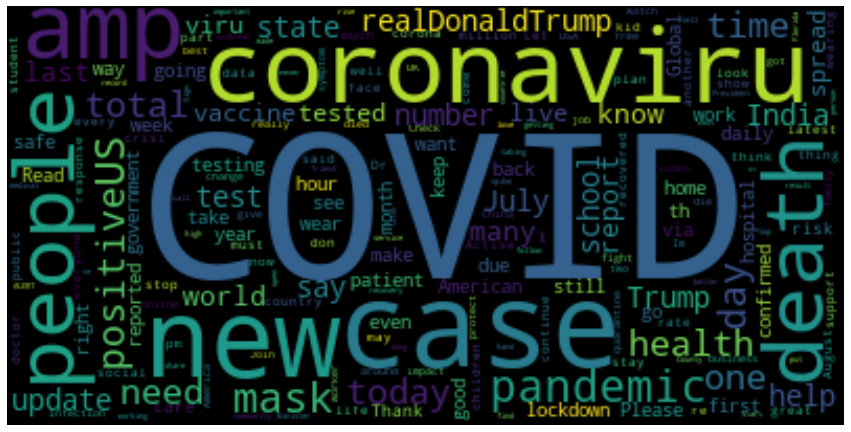

In [59]:
wordcloud2 = WordCloud(collocations=False).generate(words_corpus)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')